# Make an MTH5 from ZEN data

This notebook provides an example of how to read in ZEN (.Z3D) files into an MTH5.  

In [1]:
from mth5.clients import MakeMTH5

## Build MTH5

Now that we have a logical collection of files, lets load them into an MTH5.  We will simply loop of the stations, runs, and channels in the ordered dictionary.

There are a few things that we need to keep track of.  

- The station metadata pulled directly from the Z3D files can be input into the station metadata, be sure to use the `write_metadata` method to write the metadata to the MTH5.
- The Z3D files have the coil response and zen response embedded in the file, so we can put those into the appropriate filter container in MTH5.  This is important for calibrating later.  
- Since this is a MTH5 file version 0.2.0 the filters are in the `survey_group` so add them there.
- If you want to calibrate the data set calibrate to `True`.  

In [2]:
mth5_path = MakeMTH5.from_zen(
    r"c:\\Users\\jpeacock\\OneDrive - DOI\\MTData\\MIST2025\\1013", 
    calibration_path=r"c:\\Users\\jpeacock\\OneDrive - DOI\\MTData\\antenna_20190411.cal",
    survey_id="MIST2025",
    combine=True,
    #**kwargs
    )

2025-03-20T10:22:47.498966-0700 | WARNING | mth5.mth5 | open_mth5 | from_zen.h5 will be overwritten in 'w' mode
2025-03-20T10:22:47.891730-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\sandbox_scripts\from_zen.h5 in mode w
2025-03-20T10:22:50.237413-0700 | WARNING | mth5.io.zen.zen | read_z3d | GPS stamps are not 1 second apart for file Zen047Ch3_20250317-180011_526.z3d.
2025-03-20T10:22:50.238414-0700 | WARNING | mth5.io.zen.zen | read_z3d | Time block between stamps was not the sample rate for file Zen047Ch3_20250317-180011_526.z3d
2025-03-20T10:22:51.787955-0700 | WARNING | mth5.io.zen.zen | read_z3d | GPS stamps are not 1 second apart for file Zen047Ch4_20250317-180011_422.z3d.
2025-03-20T10:22:51.788957-0700 | WARNING | mth5.io.zen.zen | read_z3d | Time block between stamps was not the sample rate for file Zen047Ch4_20250317-180011_422.z3d
2025-03-20T10:22:53.305513-0700 | WARNING | mth5.io.zen.zen | read

In [1]:
from mtpy.processing.aurora import process_aurora

In [ ]:
ap = process_aurora.AuroraProcessing()

ap.local_station_id = "1013"
ap.local_mth5_path = r"c:\\Users\\jpeacock\\OneDrive - DOI\\MTData\\MIST2025\\1013\\mist2025_1013_zen.h5"
ap.merge_dictionar = {
    256: {"period_min": 1.0 / 25, "period_max": 100},
    1: {"period_min": 100, "period_max": 10000},
    4096: {"period_min": 1.0 / 2000, "period_max": 1.0 / 26},
}

In [3]:
tf_processed = ap.process([4096, 256, 1])

2025-03-20T10:48:17.170862-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\Users\jpeacock\OneDrive - DOI\MTData\MIST2025\1013\mist2025_1013_zen.h5
2025-03-20T10:48:17.191901-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'pandas._libs.missing.NAType'>.
2025-03-20T10:48:17.193912-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
2025-03-20T10:48:17.194902-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'NoneType'>.
2025-03-20T10:48:17.197415-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'NoneType'>.
2025-03-20T10:48:17.198457-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | Kerne

TypeError: Got both 'size' and 'fontsize', which are aliases of one another

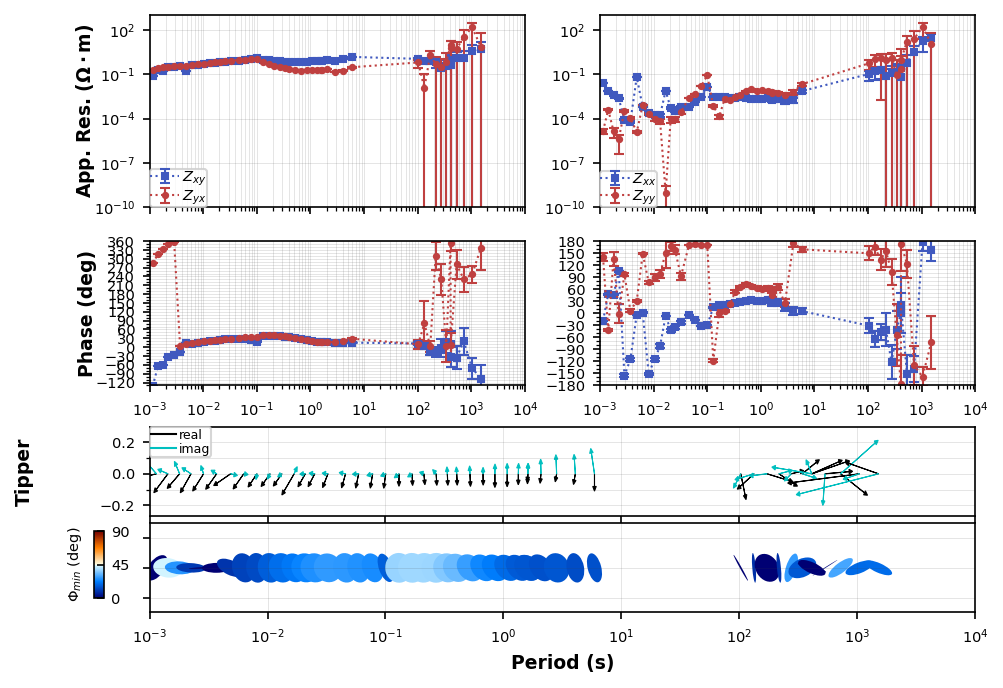

In [6]:
tf_processed["combined"]["tf"].plot_mt_response(plot_num=2)